In [24]:
import sys
sys.path.append("..") # Add neuroginius to PYTHONPATH

In [25]:
from neuroginius.atlas import Atlas
import numpy as np
import matplotlib.pyplot as plt
from neuroginius.synthetic_data.generation import generate_topology, generate_correlations, generate_topology_net_interaction
from neuroginius.networks import group_groupby

ATLAS = "msdl"

atlas = Atlas.from_name(ATLAS)

Let's generate a few matrices with very simple structures :

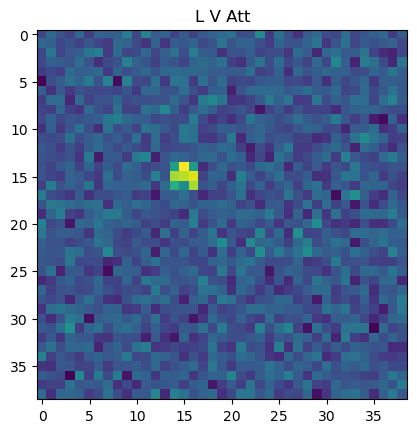

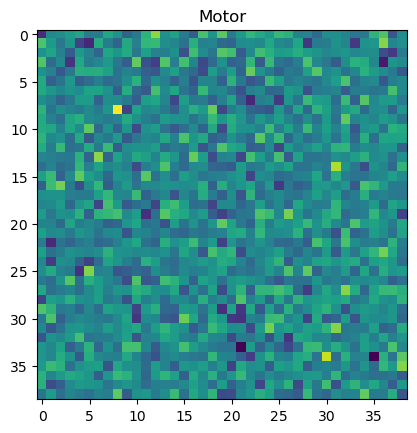

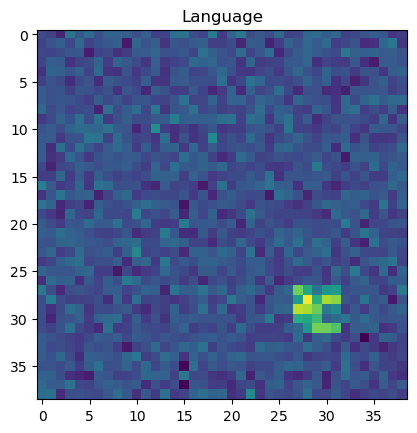

In [26]:
arr = np.array(atlas.macro_labels)
rng = np.random.default_rng(1999)
networks = rng.choice(np.unique(arr), 3, replace=False)

matrices = []
for network in networks:
    mat = generate_topology(network, atlas.macro_labels)
    mat *= rng.uniform(0, 1, size=mat.shape)
    mat += rng.normal(0, 0.1, size=mat.shape)
    matrices.append(mat)
    plt.imshow(mat)
    plt.title(network)
    plt.show()

We might want to aggregate edge values into larger blocks,
typicallly yeo networks in the case of schaefer atlas.
A single matrix can be transformed into a block matrix
using the `groupby_blocks` function from neuroginius.
This function groups the edges (`labels` attribute in atlas)
by block labels (`macro_labels`) and compute the average
within each block. TODO We could allow passing a custom
aggregating function, to compute integration for instance. 
`block_block` already supports custom funcs.

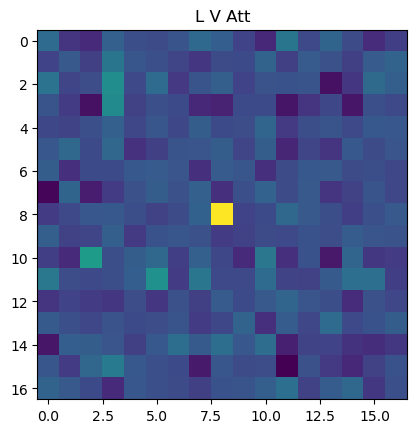

In [27]:
from neuroginius.networks import groupby_blocks

grouped, new_labels = groupby_blocks(matrices[0], atlas)
plt.imshow(grouped.values)
plt.title(networks[0])
plt.show()

Most of the times we need to perform that operation on an
iterable of matrices, hence the mysterious `group_groupby`
function.

Grouping edges into new blocks : ['Ant IPS', 'Aud', 'Basal', 'Cereb', 'Cing-Ins', 'D Att', 'DMN', 'Dors PCC', 'L V Att', 'Language', 'Motor', 'Occ post', 'R V Att', 'Salience', 'Striate', 'Temporal', 'Vis Sec']


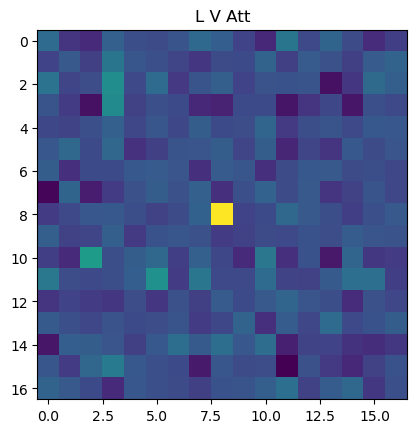

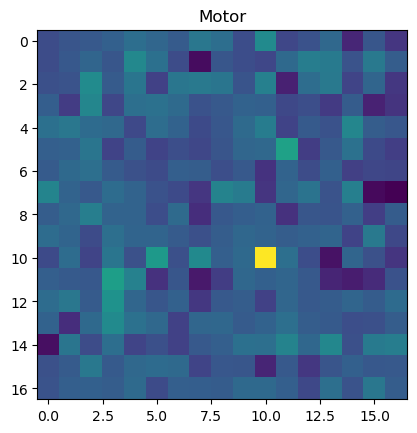

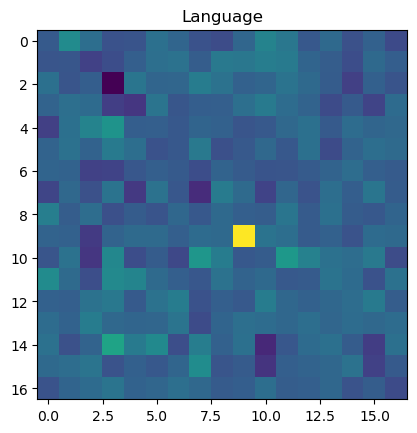

In [28]:
from neuroginius.networks import group_groupby

blocks, labels = group_groupby(matrices, atlas)
print(f"Grouping edges into new blocks : {labels}")
for block, network in zip(blocks, networks):
    plt.imshow(block)
    plt.title(f"{network}")
    plt.show()
